## SCRAPING SITO DEL CENTRO RICERCA GOLINELLI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.fondazionegolinelli.it/en"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Fondazione Golinelli


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://www.fondazionegolinelli.it/area-impresa',
 'https://www.fondazionegolinelli.it/area-ricerca-alta-formazione',
 'https://www.fondazionegolinelli.it/chi-siamo#sostienici',
 'http://www.diverserighestudio.it/',
 'https://www.fondazionegolinelli.it/cookie-policy',
 'https://www.fondazionegolinelli.it/area-arti#summerschool',
 'cookie-policy',
 'https://www.fondazionegolinelli.it/en/events?areas[]=1',
 'https://www.fondazionegolinelli.it/chi-siamo#sponsor-e-partner',
 'https://www.fondazionegolinelli.it/area-impresa/g-factor',
 'https://www.fondazionegolinelli.it/news/145',
 '#homeCarousel',
 'https://www.fondazionegolinelli.it/en?locale=it ',
 'https://www.fondazionegolinelli.it/en/news',
 'https://www.fondazionegolinelli.it/area-scuola#attivita-didattica',
 'https://www.fondazionegolinelli.it/en/newsletter',
 'https://www.fondazionegolinelli.it/rassegna-stampa',
 'https://www.fondazionegolinelli.it/privacy',
 'https://www.fondazionegolinelli.it/news',
 'https://www.fondazionegol

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.fondazionegolinelli.it'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.fondazionegolinelli.it/area-impresa',
 'https://www.fondazionegolinelli.it/area-ricerca-alta-formazione',
 'https://www.fondazionegolinelli.it/chi-siamo#sostienici',
 'https://www.fondazionegolinelli.it/cookie-policy',
 'https://www.fondazionegolinelli.it/area-arti#summerschool',
 'https://www.fondazionegolinelli.it/news/145',
 'https://www.fondazionegolinelli.it/en/events?areas[]=1',
 'https://www.fondazionegolinelli.it/chi-siamo#sponsor-e-partner',
 'https://www.fondazionegolinelli.it/area-impresa/g-factor',
 'https://www.fondazionegolinelli.it/en?locale=it ',
 'https://www.fondazionegolinelli.it/en/news',
 'https://www.fondazionegolinelli.it/area-scuola#attivita-didattica',
 'https://www.fondazionegolinelli.it/en/newsletter',
 'https://www.fondazionegolinelli.it/rassegna-stampa',
 'https://www.fondazionegolinelli.it/privacy',
 'https://www.fondazionegolinelli.it/news',
 'https://www.fondazionegolinelli.it/area-arti#mostre',
 'https://www.fondazionegolinelli.it/chi-siam

In [5]:
matchers = ['/news','ricerca']
lista_url2 = [s for s in lista_url2 if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['https://www.fondazionegolinelli.it/area-ricerca-alta-formazione',
 'https://www.fondazionegolinelli.it/area-ricerca-alta-formazione#data-science',
 'https://www.fondazionegolinelli.it/news/164',
 'https://www.fondazionegolinelli.it/area-ricerca-alta-formazione#reactor',
 'https://www.fondazionegolinelli.it/news/145',
 'https://www.fondazionegolinelli.it/news/163',
 'https://www.fondazionegolinelli.it/en/news',
 'https://www.fondazionegolinelli.it/en/newsletter',
 'https://www.fondazionegolinelli.it/news/151',
 'https://www.fondazionegolinelli.it/news']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"row"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli',
 'Fondazione Golinelli']

In [7]:
texts[0]

"\n\nArti e Scienze\n\nLe mostre\nConvegni e seminari\nEntrepreneurshipin Humanities\n\n\n\nScuola\n\nAttività didattica\nFormazione insegnanti\nScuola-Impresa\nProgetti speciali\nEventi\n\n\n\nImpresa\n\nG-Factor\nInnovazione e cultura d'impresa\nEventi\n\n\n\n\nRicerca e Alta formazione\n\n\nData Science\nReActor\n\n\n"

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' '))

#print(texts2)

In [9]:
texts2[1]

"  Arti e Scienze  Le mostre Convegni e seminari Entrepreneurshipin Humanities    Scuola  Attività didattica Formazione insegnanti Scuola-Impresa Progetti speciali Eventi    Impresa  G-Factor Innovazione e cultura d'impresa Eventi     Ricerca e Alta formazione   Data Science ReActor   "

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [11]:
texts3[0]

"e e - Impresa Impresa G - Factor e d ' impresa e Data Science ReActor"

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

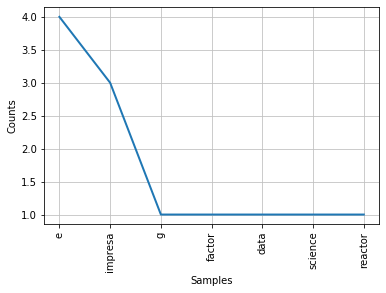

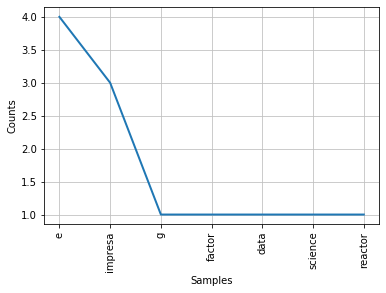

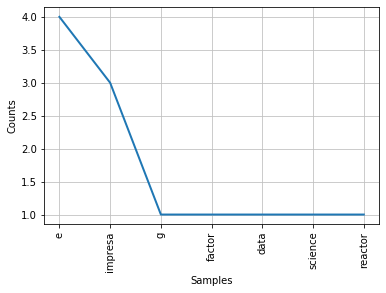

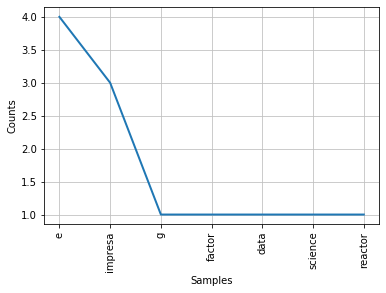

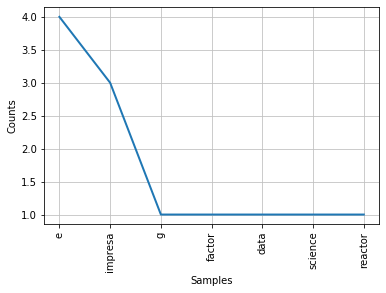

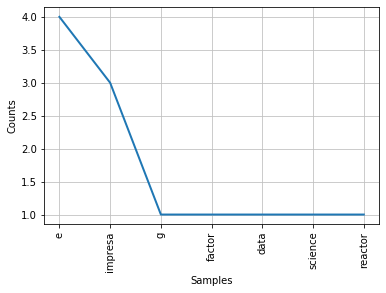

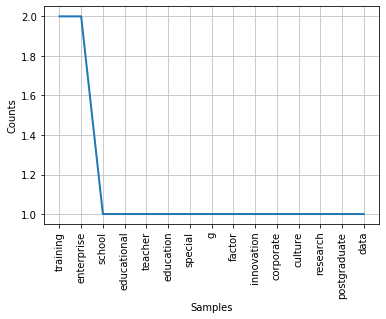

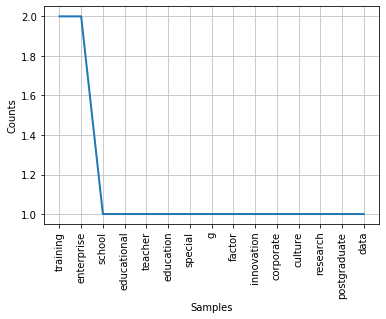

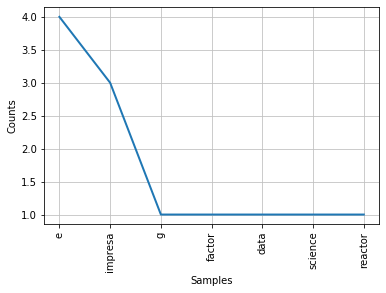

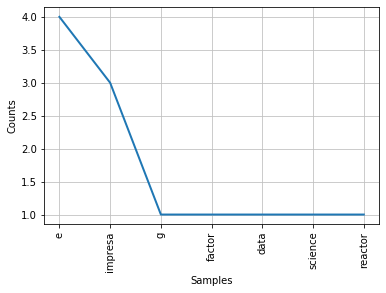

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [15]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
1,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
2,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
3,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
4,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
5,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
6,Fondazione Golinelli,"{'school': 1, 'educational': 1, 'teacher': 1, ..."
7,Fondazione Golinelli,"{'school': 1, 'educational': 1, 'teacher': 1, ..."
8,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."
9,Fondazione Golinelli,"{'e': 4, 'impresa': 3, 'g': 1, 'factor': 1, 'd..."


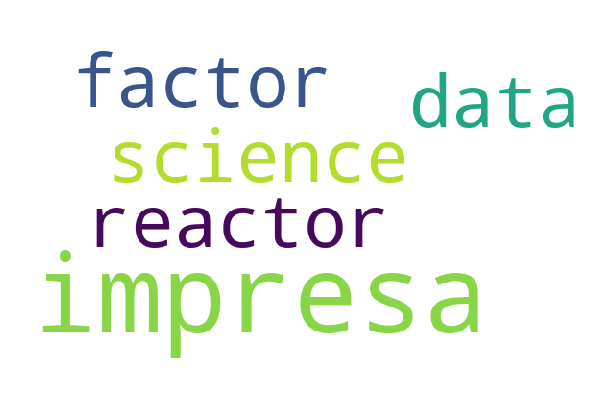

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [17]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [18]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

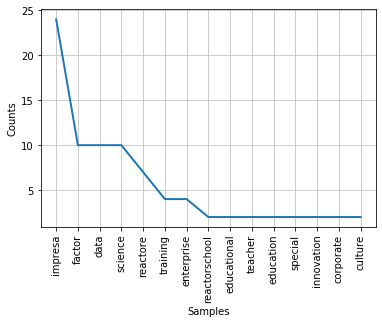

In [19]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [20]:
textfile = open('Golinelli.txt', 'w')
textfile.write(tot_text)
textfile.close()

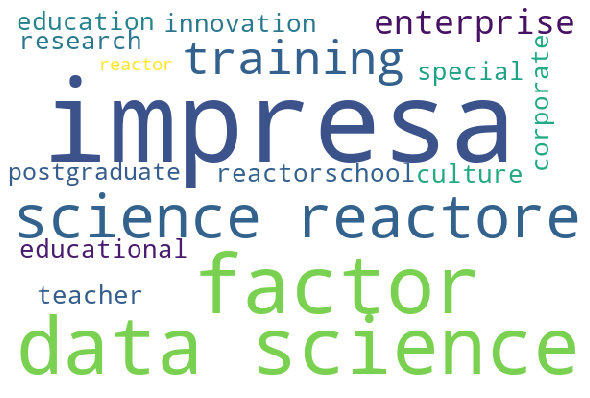

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()